Analyzing the effectiveness of test preparation courses

In [285]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:
# Loading of dataset
df = pd.read_csv('data/exams.csv')

#First five rows of dataset
display(df.head(5))

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [287]:
# General information about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [288]:
# Defining quantity of unique values in each column
print(df.nunique())

gender                     2
race/ethnicity             5
parent_education_level     6
lunch                      2
test_prep_course           2
math                      81
reading                   72
writing                   77
dtype: int64


In [289]:
# Statistical information
df[['math', 'reading', 'writing']].describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<AxesSubplot:xlabel='writing'>

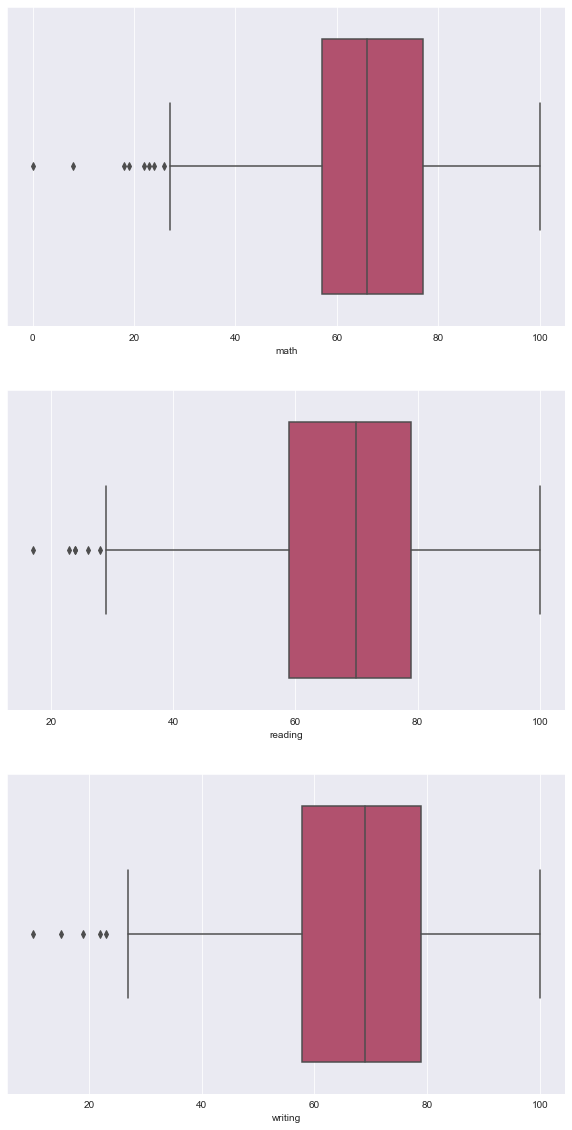

In [290]:
# Visualization of statistical information
fig, axes = plt.subplots(3, 1, figsize = (10, 20), sharey = True)
sns.set_style('darkgrid')
sns.boxplot(x = 'math', data = df, ax = axes[0], palette = 'flare')
sns.boxplot(x = 'reading', data = df, ax = axes[1], palette = 'flare')
sns.boxplot(x = 'writing', data = df, ax = axes[2], palette = 'flare')

<AxesSubplot:>

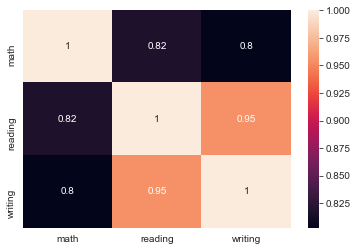

In [291]:
# Defining correlation between columns
df_corr = df[['math', 'reading', 'writing']].corr()
sns.heatmap(data = df_corr, annot = True)

<AxesSubplot:xlabel='test_prep_course', ylabel='count'>

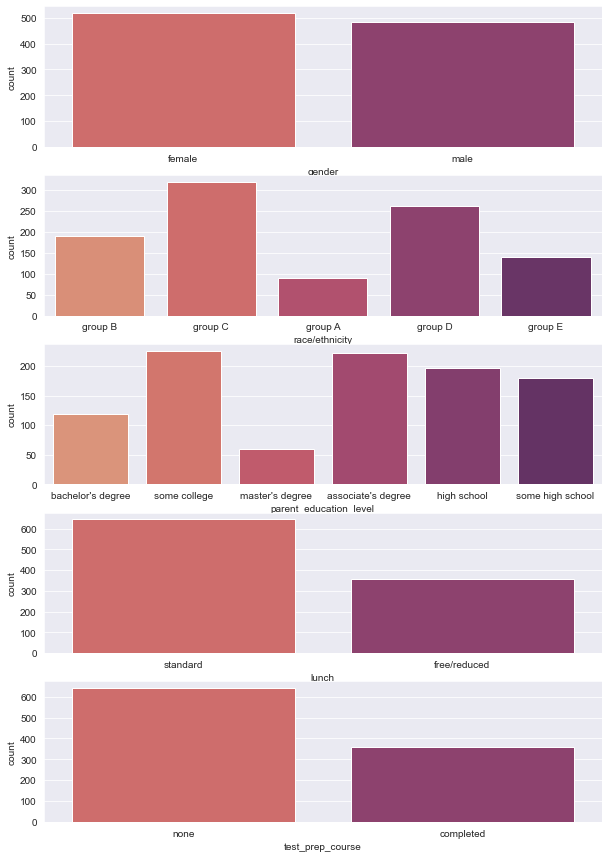

In [292]:
# Visualization of counting plots for each object column
fig, axes = plt.subplots(5, 1, figsize = (10, 15))
sns.countplot(x = 'gender', data = df, ax = axes[0], palette = 'flare')
sns.countplot(x = 'race/ethnicity', data = df, ax = axes[1], palette = 'flare') 
sns.countplot(x = 'parent_education_level', data = df, ax = axes[2], palette = 'flare')
sns.countplot(x = 'lunch', data = df, ax = axes[3], palette = 'flare')
sns.countplot(x = 'test_prep_course', data = df, ax = axes[4], palette = 'flare')

In [293]:
# Creating new column 'Avarage score'
df['Avarage score'] = (df['math'] + df['reading'] + df['writing'])/3

In [294]:
# Defining how gender impact on math, reading, writing
df.groupby('gender')[['math', 'reading', 'writing']].mean()

,math,reading,writing
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<AxesSubplot:xlabel='gender', ylabel='Avarage score'>

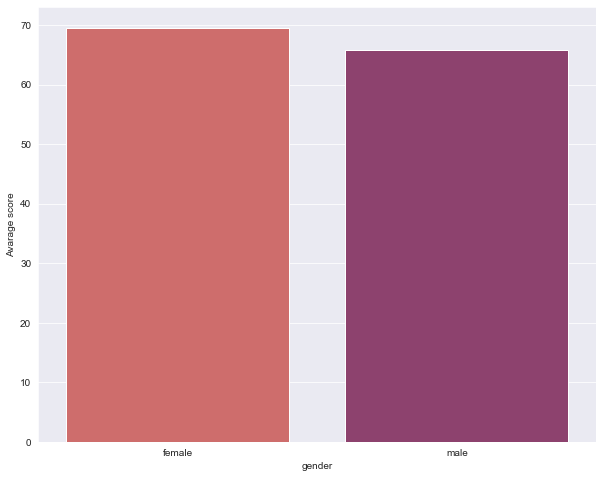

In [295]:
# Visualization how gender impact on the avarage score
df_gender = df.groupby('gender')[['math', 'reading', 'writing', 'Avarage score']].mean()
df_gender.reset_index(inplace = True)
plt.figure(figsize=(10, 8))
sns.barplot(x = 'gender', y = 'Avarage score', data = df_gender, palette = 'flare')

In [296]:
# Defining how race/ethnicity impact on math, reading, writing
df.groupby('race/ethnicity')[['math', 'reading', 'writing']].mean()

,math,reading,writing
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


<AxesSubplot:xlabel='race/ethnicity', ylabel='Avarage score'>

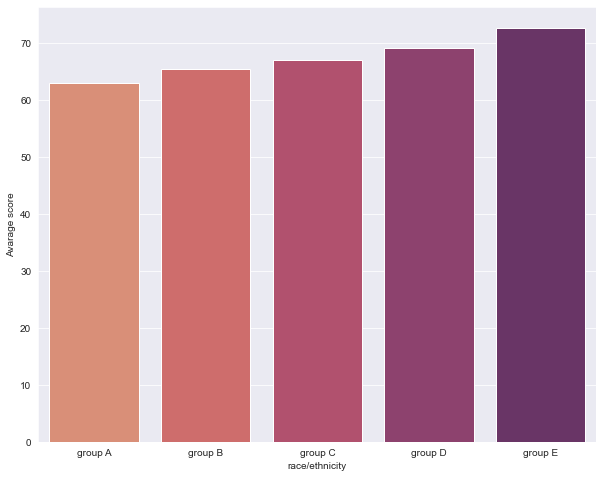

In [297]:
# Visualization how race/ethnicity impact on the avarage score
df_race = df.groupby('race/ethnicity')[['math', 'reading', 'writing', 'Avarage score']].mean()
df_race.reset_index(inplace = True)
plt.figure(figsize=(10, 8))
sns.barplot(x = 'race/ethnicity', y = 'Avarage score', data = df_race, palette = 'flare')

In [298]:
# Defining how parent education level impact on math, reading, writing
df.groupby('parent_education_level')[['math', 'reading', 'writing']].mean()

,math,reading,writing
parent_education_level,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


<AxesSubplot:xlabel='parent_education_level', ylabel='Avarage score'>

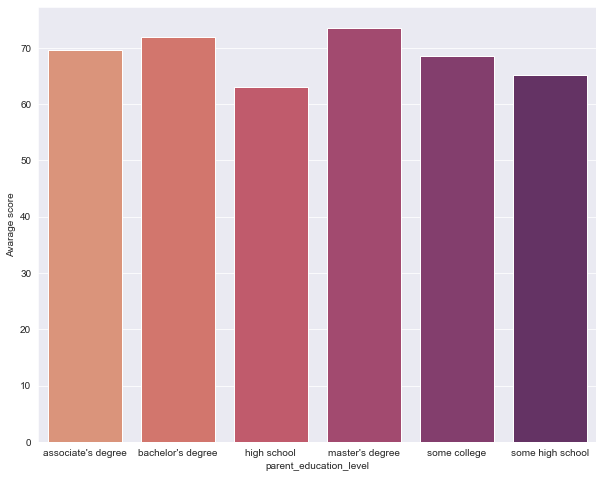

In [299]:
# Visualization how parent education level impact on the avarage score
df_parent_edu = df.groupby('parent_education_level')[['math', 'reading', 'writing', 'Avarage score']].mean()
df_parent_edu.reset_index(inplace = True)
plt.figure(figsize=(10, 8))
sns.barplot(x = 'parent_education_level', y = 'Avarage score', data = df_parent_edu, palette = 'flare')

In [300]:
# Defining how lunch impact on math, reading, writing
df.groupby('lunch')[['math', 'reading', 'writing']].mean()

,math,reading,writing
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


<AxesSubplot:xlabel='lunch', ylabel='Avarage score'>

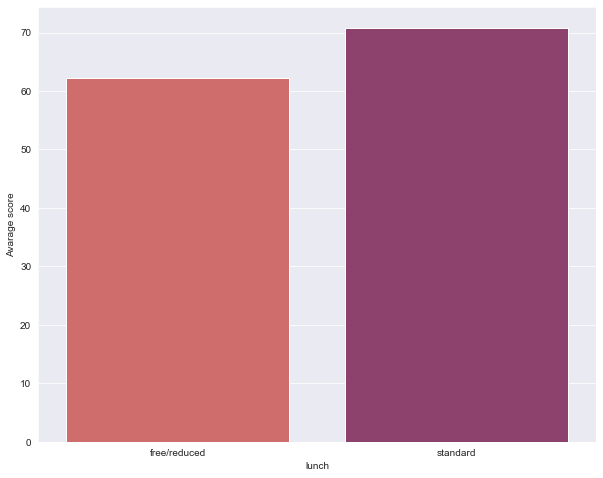

In [301]:
# Visualization how lunch impact on the avarage score
df_lunch = df.groupby('lunch')[['math', 'reading', 'writing', 'Avarage score']].mean()
df_lunch.reset_index(inplace = True)
plt.figure(figsize=(10, 8))
sns.barplot(x = 'lunch', y = 'Avarage score', data = df_lunch, palette = 'flare')

In [302]:
# Defining how test course impact on math, reading, writing
df.groupby('test_prep_course')[['math', 'reading', 'writing']].mean()

,math,reading,writing
test_prep_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<AxesSubplot:xlabel='test_prep_course', ylabel='Avarage score'>

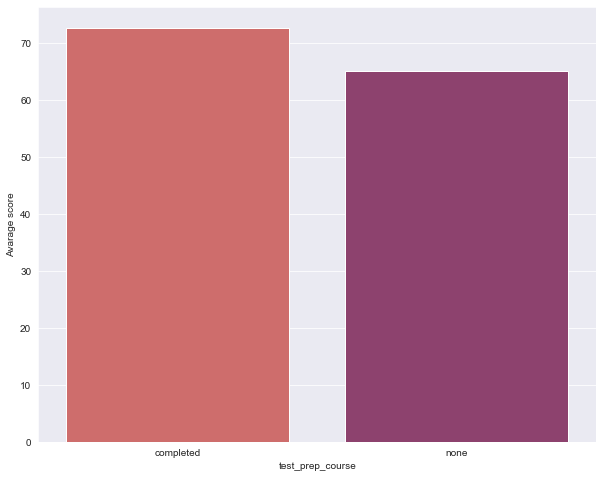

In [303]:
# Visualization how test course impact on the avarage score
df_test_prep_course = df.groupby('test_prep_course')[['math', 'reading', 'writing', 'Avarage score']].mean()
df_test_prep_course.reset_index(inplace = True)
plt.figure(figsize=(10, 8))
sns.barplot(x = 'test_prep_course', y = 'Avarage score', data = df_test_prep_course, palette = 'flare')